In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import dirichlet, multinomial
%matplotlib inline

In [32]:
dist = dirichlet([0.3,0.4])

In [33]:
dist.pdf([0.2,0.8])

0.6899639725181715

#### Exact computation

In [11]:
from math import gamma

In [14]:
alpha = [0.3,0.4]
coef = gamma(np.sum(alpha)) / \
           np.multiply.reduce([gamma(a) for a in alpha])

In [29]:
(0.2**(0.3-1))*(0.8**(0.4-1))*coef

0.6899639725181719

In [17]:
x=[0.2,0.8]
dirch_pdf = coef * np.multiply.reduce([xx ** (aa - 1)
                                               for (xx, aa)in zip(x, alpha)])

In [18]:
dirch_pdf

0.6899639725181719

### Use

Suppose we have a random variable with two possible outcomes (i.e yes/no in the elections). Then we assume that each event (yes, no) can happen with probabilities (theta_1, theta_2). Using a dirichlet distribution to describe this variable is the most general way since it accounts for a family of binomial (in this case) distributions. As more data are added into the sample, alpha 

#### Example

Consider the sample:
    
{yes, yes, no, yes, yes, yes}

Using a multinomial (binomial) distribution for this variable we would have to assing a probability of theta_1 for yes, theta_2 for no and the pdf for this variable would be:
    
pdf = (theta_1^5)*(theta_2^1)

Then by minimizing the log likelihood function the parameters theta_1, theta_2 can be calculated and will in fact be:

    theta_1 = (# of yes)/(# of yes + # of no)
    
    theta_2 = (# of no)/(# of yes + # of no)

In [49]:
dist1 = multinomial(6, np.array([5/6,1/6]))
dist1.pmf([5,1])

0.40187757201646107

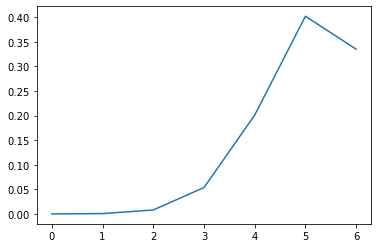

In [54]:
x = np.linspace(0,6,7)
y = np.zeros(7)
#y = np.linspace(1,10,10)
for i in range(0,x.shape[0]):
    y[i] = 6 - x[i]
y[y<0] = 0
xy = np.array([x,y])
xy = np.array([x,y]).T
plt.plot(dist1.pmf(xy))

Using a family of distributions to describe theta_1, theta_2 allows more flexibility as it can pivot the distributions to the right direction given our prior knowledge for the result of the elections. Deciding on alpha=[0.5, 0.5] means that we consider both events equally likely. Then pdf is calculated as:
    
    pdf = (theta_1^((0.5-1)*5))*(theta_2^((0.5-1)*1))

Then log likelihood minimization will give:

theta_1 = (# of yes + alpha)/(# of yes + # of no + alpha)

theta_2 = (# of no + alpha)/(# of yes + # of no + alpha)

The prior knowledge will be additional to the sufficient statistics given the data

In [57]:
dist = dirichlet([5/6,1/6])
dist.pdf([5/6,1/6]), dist.pdf([1/6,5/6])

(0.7302580973932808, 0.24974475628167975)

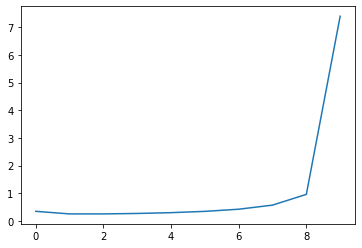

In [83]:
x = np.linspace(0.01,0.99,10)
y = np.zeros(10)
#y = np.linspace(1,10,10)
for i in range(0,x.shape[0]):
    y[i] = 1 - x[i]
y[y<0] = 0
xy = np.array([x,y])
xy = np.array([x,y]).T
plt.plot([dist.pdf(xy[i]) for i in range(xy.shape[0])])

In [224]:
x = np.linspace(0.01,0.99,10)
y = np.zeros(10)
for i in range(0,x.shape[0]):
    y[i] = 1 - x[i]
y[y<0] = 0
xy = np.array([x,y])
xy = np.array([x,y]).T
dist_val = [dist.pdf(xy[i]) for i in range(xy.shape[0])]

<IPython.core.display.Javascript object>


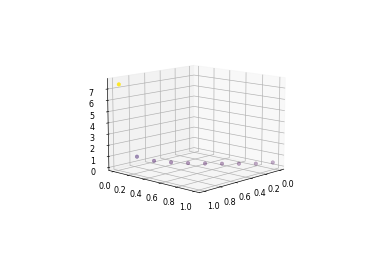

In [290]:
%matplotlib notebook
ax = plt.axes(projection='3d')
ax.scatter(x, y, dist_val, c=dist_val, cmap='viridis', linewidth=0.5);

#### Guide to create triangulation grid and plot Dirichlet contours

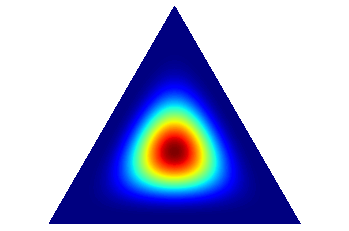

In [338]:
# Reference: http://blog.bogatron.net/blog/2014/02/02/visualizing-dirichlet-distributions/
%matplotlib inline

#create equilateral triangle of unit sides
corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
AREA = 0.5 * 1 * 0.75**0.5
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])
pairs = [corners[np.roll(range(3), -i)[1:]] for i in range(3)]
# The area of the triangle formed by point xy and another pair or points
tri_area = lambda xy, pair: 0.5 * np.linalg.norm(np.cross(*(pair - xy)))

def xy2bc(xy, tol=1.e-4):
    '''Converts 2D Cartesian coordinates to barycentric.'''
    coords = np.array([tri_area(xy, p) for p in pairs]) / AREA
    return np.clip(coords, tol, 1.0 - tol)


class Dirichlet(object):
    def __init__(self, alpha):
        from math import gamma
        from operator import mul
        self._alpha = np.array(alpha)
        self._coef = gamma(np.sum(self._alpha)) / \
                           np.multiply.reduce([gamma(a) for a in self._alpha])
    def pdf(self, x):
        '''Returns pdf value for `x`.'''
        from operator import mul
        return self._coef * np.multiply.reduce([xx ** (aa - 1)
                                               for (xx, aa)in zip(x, self._alpha)])

def draw_pdf_contours(dist, nlevels=200, subdiv=8, **kwargs):
    import math

    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]

    plt.tricontourf(trimesh, pvals, nlevels, cmap='jet', **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')
draw_pdf_contours(Dirichlet([5, 5, 5]))

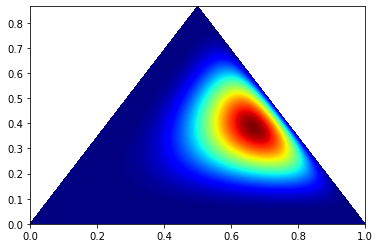

In [288]:
draw_pdf_contours(Dirichlet([2,5,5]))